## Notebook Documentation: Exploratory Data Analysis (EDA)

This notebook performs a comprehensive exploratory data analysis (EDA) on the cleaned Life Expectancy dataset. The following steps and analyses have been conducted:

1. **Data Loading and Overview**
   - Loaded the cleaned dataset and displayed the first few rows.
   - Inspected data types, column names, and basic statistics.

2. **Missing Value Analysis**
   - Checked for missing values in each column to confirm data cleanliness.

3. **Target Variable Exploration**
   - Visualized the distribution of the target variable (`Life expectancy`).

4. **Feature Correlation**
   - Generated a correlation heatmap for all numeric features to identify relationships and multicollinearity.

5. **Univariate Feature Distributions**
   - Plotted histograms for key features such as GDP, Schooling, BMI, and Adult Mortality.

6. **Country Status Analysis**
   - Analyzed and visualized the distribution of countries by development status (Developed vs Developing).

7. **Bivariate Relationships**
   - Created scatter plots to explore relationships between `Life expectancy` and key features.
   - Visualized `Life expectancy` vs GDP by country status.
   - Used pairplots to examine pairwise relationships among important variables.

8. **Temporal Trends**
   - Plotted life expectancy trends over time, segmented by country status.

9. **Outlier and Distribution Analysis**
   - Used boxplots to inspect the distribution and outliers in numerical variables.

10. **EDA Insights for Modeling**
    - Summarized key findings, including skewed features, important predictors, and potential feature interactions for the modeling phase.

---
This documentation provides a clear overview of the EDA process and the insights gained to inform subsequent modeling steps.

In [ ]:
# Load the dataset for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update the path and target column
data_path =  'cleaned_data.csv' #'Life Expectancy Data.csv'
target_col = 'Life expectancy' 

try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    raise FileNotFoundError(f"File '{data_path}' not found. Please ensure the dataset is in the working directory.")

# Display basic info
display(data.head(10))
display(data.info())
display(data.describe())





Unnamed: 0      Country  Year      Status  Life expectancy  \
0           0  Afghanistan  2015  Developing             65.0   
1           1  Afghanistan  2014  Developing             59.9   
2           2  Afghanistan  2013  Developing             59.9   
3           3  Afghanistan  2012  Developing             59.5   
4           4  Afghanistan  2011  Developing             59.2   
5           5  Afghanistan  2010  Developing             58.8   
6           6  Afghanistan  2009  Developing             58.6   
7           7  Afghanistan  2008  Developing             58.1   
8           8  Afghanistan  2007  Developing             57.5   
9           9  Afghanistan  2006  Developing             57.3   

   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Measles  \
0            263.0           62.0     0.01               71.279624   1154.0   
1            271.0           64.0     0.01               73.523582    492.0   
2            268.0           66.0     0.01               73.219243    430.0   
3            272.0           69.0     0.01               78.184215   2787.0   
4            275.0           71.0     0.01                7.097109   3013.0   
5            279.0           74.0     0.01               79.679367   1989.0   
6            281.0           77.0     0.01               56.762217   2861.0   
7            287.0           80.0     0.03               25.873925   1599.0   
8            295.0           82.0     0.02               10.910156   1141.0   
9            295.0           84.0     0.03               17.171518   1990.0   

   ...  under-five deaths  Polio  Total expenditure  Diphtheria  HIV/AIDS  \
0  ...               83.0    6.0               8.16        65.0       0.1   
1  ...               86.0   58.0               8.18        62.0       0.1   
2  ...               89.0   62.0               8.13        64.0       0.1   
3  ...               93.0   67.0               8.52        67.0       0.1   
4  ...               97.0   68.0               7.87        68.0       0.1   
5  ...              102.0   66.0               9.20        66.0       0.1   
6  ...              106.0   63.0               9.42        63.0       0.1   
7  ...              110.0   64.0               8.33        64.0       0.1   
8  ...              113.0   63.0               6.73        63.0       0.1   
9  ...              116.0   58.0               7.43        58.0       0.1   

          GDP  thinness 1-19 years  thinness 5-9 years  \
0  584.259210                 17.2                17.3   
1  612.696514                 17.5                17.5   
2  631.744976                 17.7                17.7   
3  669.959000                 17.9                18.0   
4   63.537231                 18.2                18.2   
5  553.328940                 18.4                18.4   
6  445.893298                 18.6                18.7   
7  373.361116                 18.8                18.9   
8  369.835796                 19.0                19.1   
9  272.563770                 19.2                19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2938 non-null   int64  
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Life expectancy                  2938 non-null   float64
 5   Adult Mortality                  2938 non-null   float64
 6   infant deaths                    2938 non-null   float64
 7   Alcohol                          2938 non-null   float64
 8   percentage expenditure           2938 non-null   float64
 9   Measles                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   float64
 12  Polio               

None

Unnamed: 0         Year  Life expectancy  Adult Mortality  \
count  2938.000000  2938.000000      2938.000000      2938.000000   
mean   1468.500000  2007.518720        69.141872       163.648162   
std     848.271871     4.613841         9.545250       122.162776   
min       0.000000  2000.000000        45.174000         2.370000   
25%     734.250000  2004.000000        63.000000        73.000000   
50%    1468.500000  2008.000000        72.000000       144.000000   
75%    2202.750000  2012.000000        75.600000       227.000000   
max    2937.000000  2015.000000        86.630000       583.040000   

       infant deaths      Alcohol  percentage expenditure       Measles  \
count    2938.000000  2938.000000             2938.000000   2938.000000   
mean       25.329884     4.289881              704.172946   2008.055752   
std        68.078732     4.041024             1759.271578   7434.980257   
min         0.000000     0.010000                0.000000      0.000000   
25%         0.000000     0.470000                4.685343      0.000000   
50%         3.000000     3.130000               64.912906     17.000000   
75%        22.000000     7.390000              441.534144    360.250000   
max       495.040000    13.450000            10199.412527  54163.360000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2938.000000        2938.000000  2938.000000        2938.000000   
mean     37.839443          35.877672    82.044588           5.464941   
std      20.272991          98.948058    24.178622           2.793434   
min       0.011572           0.000000     4.000000           0.076923   
25%      19.000000           0.000000    77.000000           3.740000   
50%      43.000000           4.000000    93.000000           5.540000   
75%      56.100000          28.000000    97.000000           7.330000   
max      72.063000         767.820000    99.000000          12.707100   

        Diphtheria     HIV/AIDS           GDP  thinness 1-19 years  \
count  2938.000000  2938.000000   2938.000000          2938.000000   
mean     81.819605     1.652396   6149.823387             4.736894   
std      24.453262     4.423303  12326.166286             4.227108   
min       4.000000     0.100000      0.152485             0.011572   
25%      78.000000     0.100000    190.174435             1.500000   
50%      93.000000     0.100000   1171.983435             3.300000   
75%      97.000000     0.800000   4779.405190             7.100000   
max      99.000000    29.278000  62233.867014            19.500000   

       thinness 5-9 years  Income composition of resources    Schooling  
count         2938.000000                      2938.000000  2938.000000  
mean             4.762898                         0.595015    11.323791  
std              4.295294                         0.243627     4.241956  
min              0.011572                         0.000000     0.055480  
25%              1.500000                         0.465000     9.500000  
50%              3.300000                         0.662000    12.100000  
75%              7.200000                         0.772000    14.100000  
max             19.900000                         0.923000    19.000000

### Value of the Project

Accurate life expectancy prediction is valuable for public health officials, policymakers, and researchers. It helps in:
- Identifying key health and socio-economic drivers of life expectancy
- Guiding resource allocation and policy interventions
- Monitoring and improving population health outcomes

By comparing a custom implementation with a standard library, we also gain deeper insight into the mechanics of linear regression and model evaluation.

In [2]:
# Check for missing values
missing = data.isnull().sum()
print("Missing values per column:\n", missing)
# The dataset was cleaned earlier in the wrangle notebook

Missing values per column:
 Unnamed: 0                         0
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


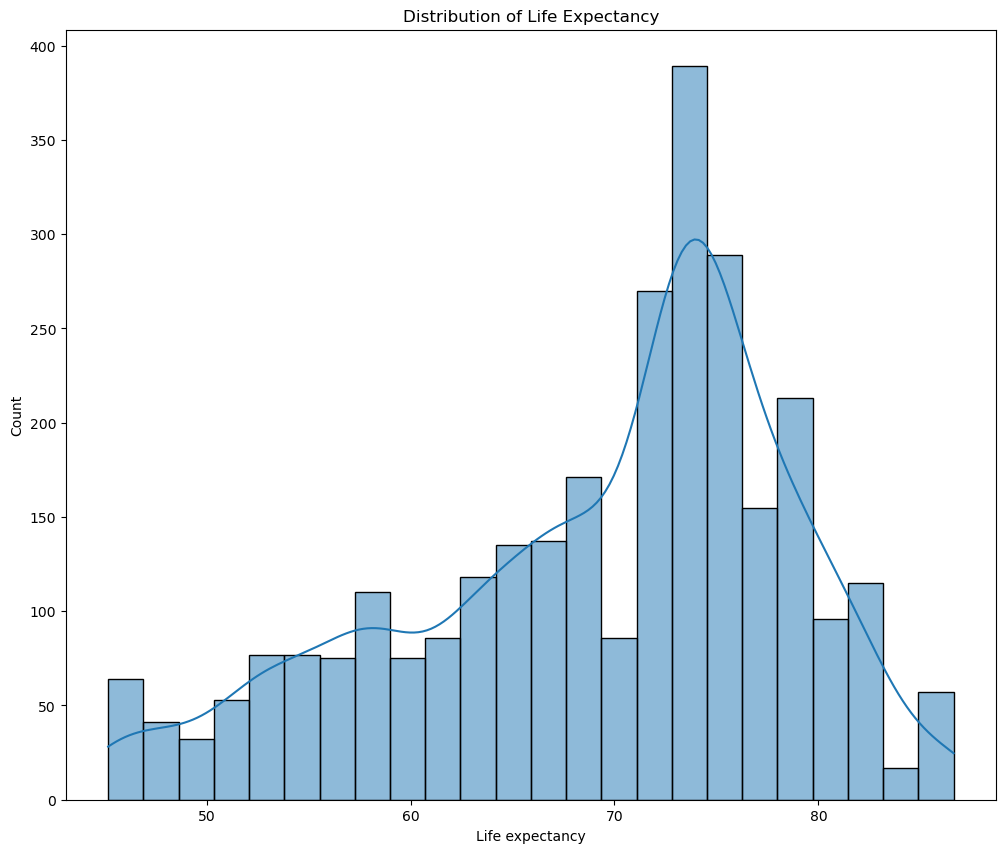

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 10))
sns.histplot(data[target_col], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()


In [4]:
# Correlation heatmap (only for numeric columns)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

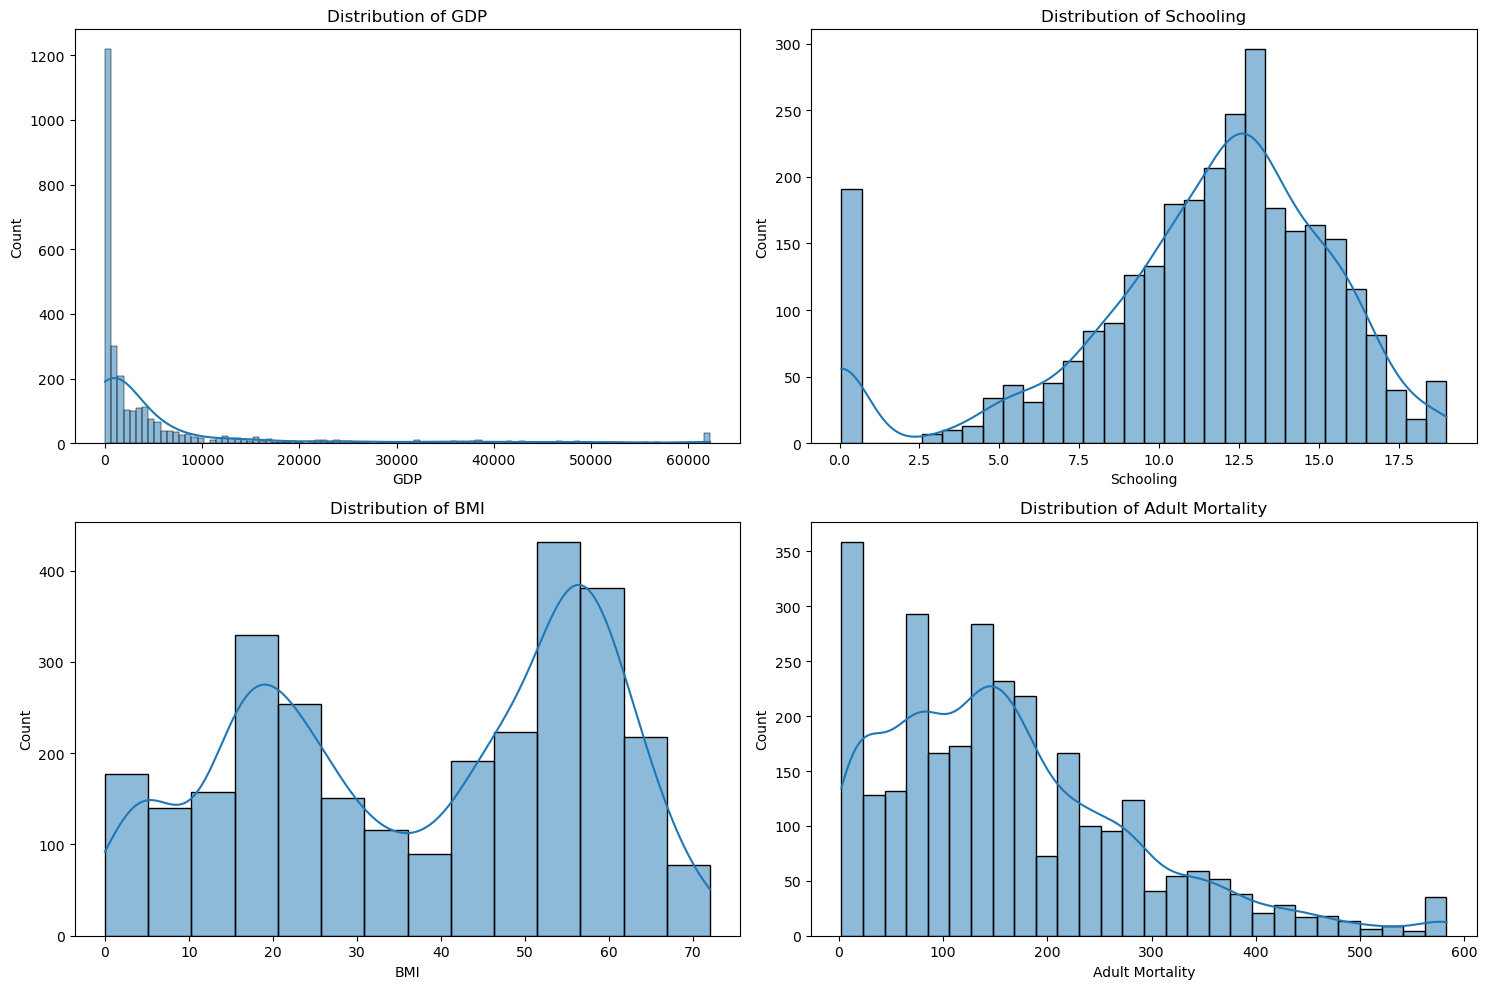

In [13]:
# Select key features to examine
features = ['GDP', 'Schooling', 'BMI', 'Adult Mortality']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [16]:
status_counts = data['Status'].value_counts(normalize=True)
print(f"Country Status Distribution:\n{status_counts}")

plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=data)
plt.title('Distribution of Country Status')
plt.xticks([0, 1], ['Developing', 'Developed'])
plt.show()

Country Status Distribution:
Status
Developing    0.825732
Developed     0.174268
Name: proportion, dtype: float64


In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[col], y=data['Life expectancy'])
    plt.title(f'Life Expectancy vs {col}')
plt.tight_layout()
plt.show()

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=data, alpha=0.6)
plt.title('Life Expectancy vs GDP by Country Status')
plt.legend(title='Status', labels=['Developing', 'Developed'])
plt.show()

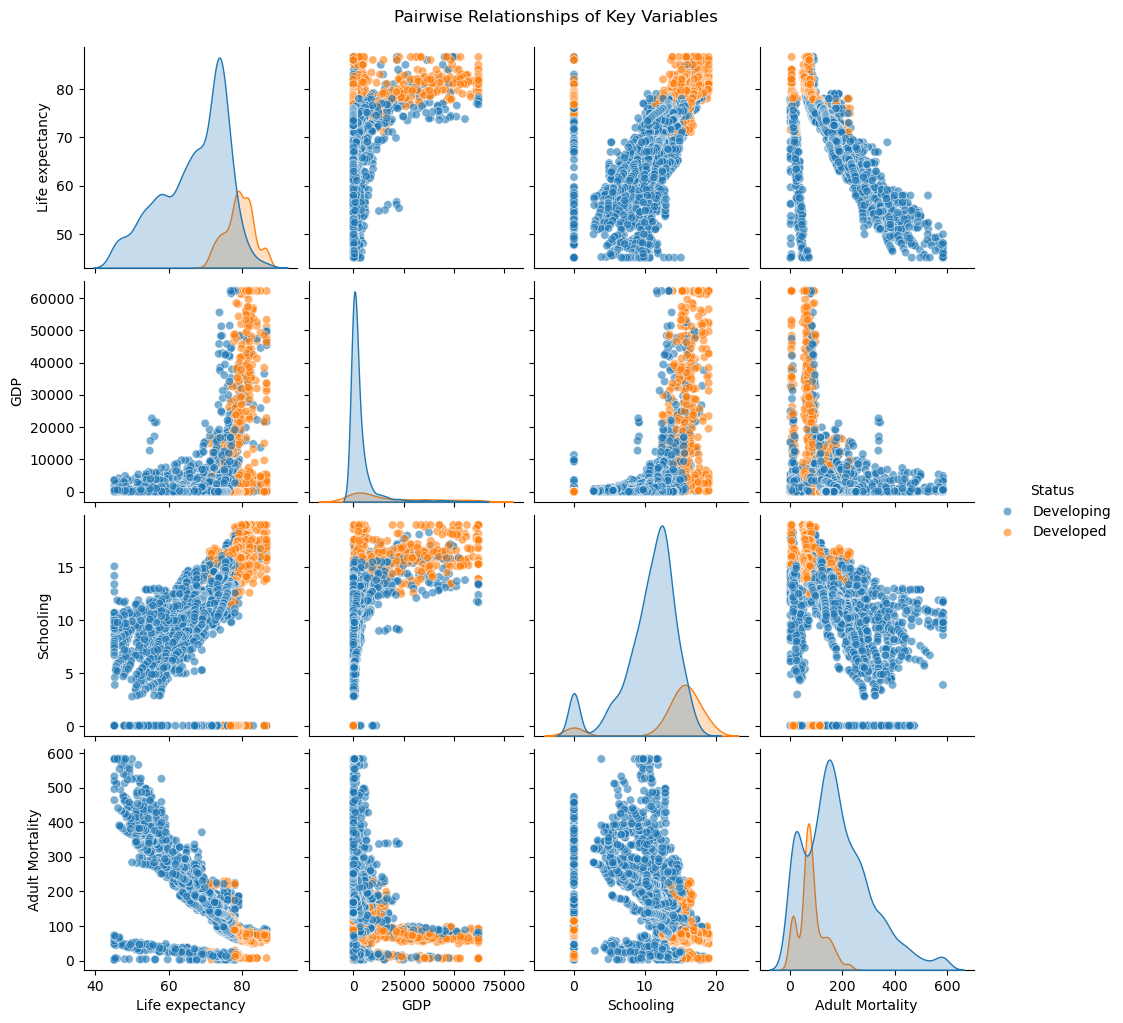

In [29]:
sns.pairplot(data[['Life expectancy', 'GDP', 'Schooling', 'Adult Mortality', 'Status']], 
             hue='Status', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Key Variables', y=1.02)
plt.show()

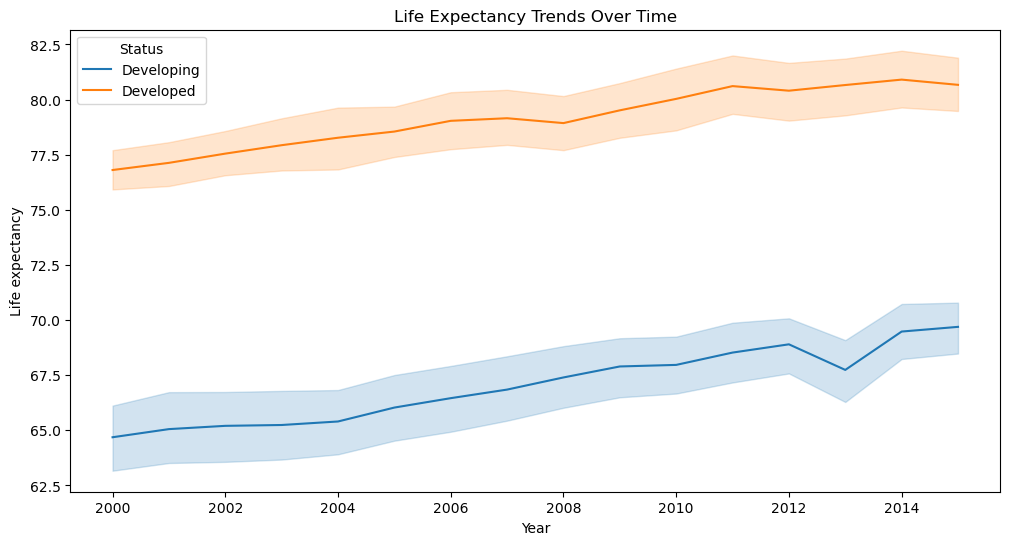

In [39]:
if 'Year' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=data);
    plt.title('Life Expectancy Trends Over Time')
    plt.show()

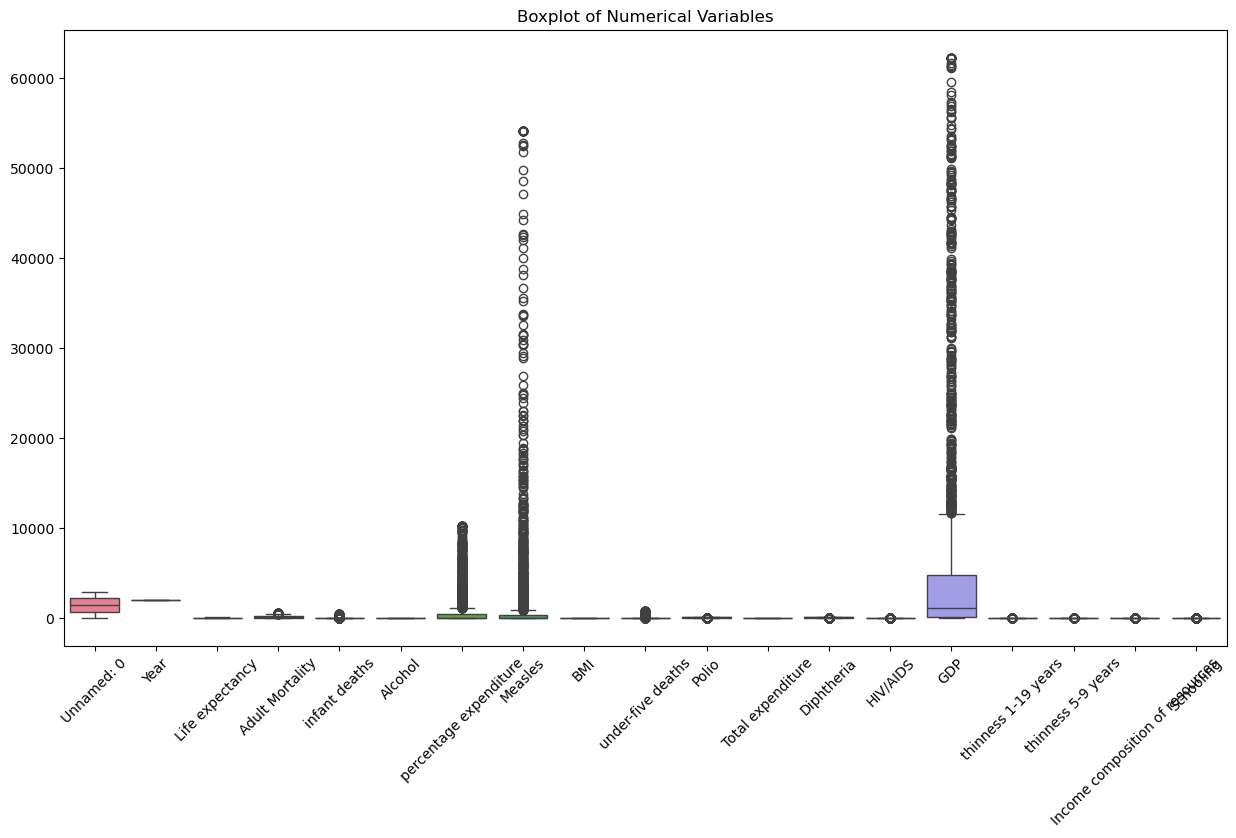

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.show()

In [35]:
# insights for modeling phase
eda_insights = {
    'skewed_features': ['GDP', 'Schooling'],
    'important_predictors': ['Schooling', 'Adult Mortality', 'BMI', 'GDP'],
    'potential_interactions': [('GDP', 'Status')]
}

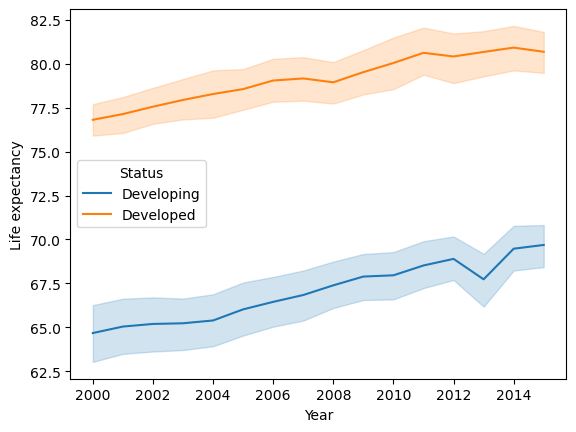

In [ ]:
sns.lineplot(x='Year', y='Life expectancy', hue='Status', data=data);